In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense

In [2]:
data_train=pd.read_csv("data/housePrice/train.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
X_train=data_train[["OverallQual","GrLivArea","GarageCars","WoodDeckSF","GarageArea"]].values
Y_train=data_train["SalePrice"].values

In [14]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(5,activation="sigmoid"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10,activation="tanh"),
    tf.keras.layers.Dense(1,activation="linear")
   ])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1),
                loss="mae")

In [7]:
output=model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
46/46 [==============================] - 2s 2ms/step - loss: 180695.7969
Epoch 2/300
46/46 [==============================] - 0s 2ms/step - loss: 180188.0625
Epoch 3/300
46/46 [==============================] - 0s 3ms/step - loss: 179679.9688
Epoch 4/300
46/46 [==============================] - 0s 3ms/step - loss: 179172.6094
Epoch 5/300
46/46 [==============================] - 0s 2ms/step - loss: 178665.6406
Epoch 6/300
46/46 [==============================] - 0s 3ms/step - loss: 178158.9219
Epoch 7/300
46/46 [==============================] - 0s 3ms/step - loss: 177652.2500
Epoch 8/300
46/46 [==============================] - 0s 3ms/step - loss: 177145.7812
Epoch 9/300
46/46 [==============================] - 0s 3ms/step - loss: 176639.3594
Epoch 10/300
46/46 [==============================] - 0s 3ms/step - loss: 176132.9688
Epoch 11/300
46/46 [==============================] - 0s 4ms/step - loss: 175626.6250
Epoch 12/300
46/46 [==============================] - 0s 2ms/st

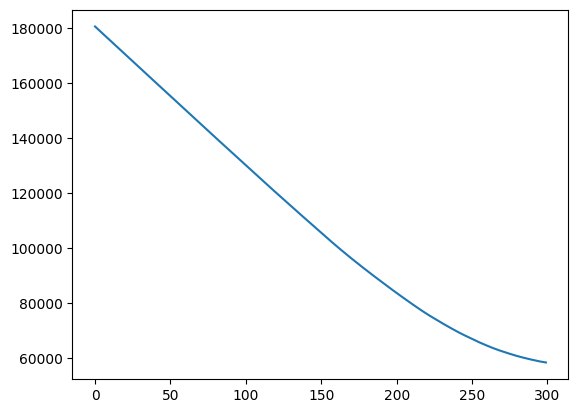

In [8]:
plt.plot(output.history["loss"])
plt.show()

In [9]:
model.save("neural_network.h5")

In [11]:
X_test=pd.read_csv("data/housePrice/test.csv")
X_test=X_test[["OverallQual","GrLivArea","GarageCars","WoodDeckSF","GarageArea"]].values
Y_test=model.predict(X_test)

46/46 [==============================] - 0s 1ms/step


In [16]:
tf.keras.models.load_model("housePrice.h5")

In [18]:
my_house = np.array([[90, 12, 0, 1, 110]])
model.predict(my_house)

1/1 [==============================] - 0s 153ms/step


array([[141358.17]], dtype=float32)